<a href="https://colab.research.google.com/github/sanahussain47/Machine-Learning-Practice-/blob/main/ML_assignment_part_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv("Social_Network_Ads.csv")

# Drop 'User ID'
df.drop('User ID', axis=1, inplace=True)

# Encode 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Select features and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

Train Models

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (k=7)': KNeighborsClassifier(n_neighbors=7),
    'Decision Tree (Gini)': DecisionTreeClassifier(criterion='gini'),
    'Decision Tree (Entropy)': DecisionTreeClassifier(criterion='entropy')
}

Evaluate Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluation function
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

# Run evaluations
for name, model in models.items():
    evaluate_model(name, model)

Model: Naive Bayes
Accuracy: 0.93
Precision: 0.9411764705882353
Recall: 0.8648648648648649
F1 Score: 0.9014084507042254
Confusion Matrix:
 [[61  2]
 [ 5 32]]
------------------------------
Model: KNN (k=3)
Accuracy: 0.92
Precision: 0.8918918918918919
Recall: 0.8918918918918919
F1 Score: 0.8918918918918919
Confusion Matrix:
 [[59  4]
 [ 4 33]]
------------------------------
Model: KNN (k=5)
Accuracy: 0.93
Precision: 0.8947368421052632
Recall: 0.918918918918919
F1 Score: 0.9066666666666666
Confusion Matrix:
 [[59  4]
 [ 3 34]]
------------------------------
Model: KNN (k=7)
Accuracy: 0.93
Precision: 0.875
Recall: 0.9459459459459459
F1 Score: 0.9090909090909091
Confusion Matrix:
 [[58  5]
 [ 2 35]]
------------------------------
Model: Decision Tree (Gini)
Accuracy: 0.84
Precision: 0.7837837837837838
Recall: 0.7837837837837838
F1 Score: 0.7837837837837838
Confusion Matrix:
 [[55  8]
 [ 8 29]]
------------------------------
Model: Decision Tree (Entropy)
Accuracy: 0.84
Precision: 0.8
Recal

For Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
def plot_decision_boundary(X, y, model, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
    )
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2,
                 model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age (standardized)')
    plt.ylabel('Estimated Salary (standardized)')
    plt.legend()
    plt.show()

<ipython-input-5-563e9947badd>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


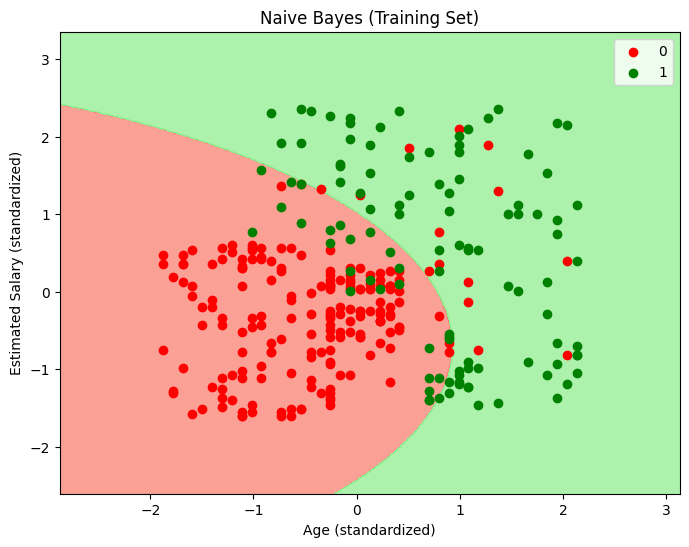

<ipython-input-5-563e9947badd>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


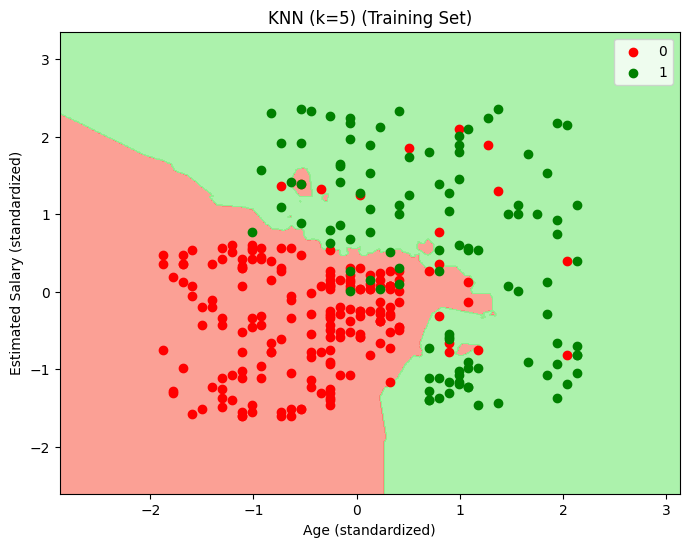

<ipython-input-5-563e9947badd>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


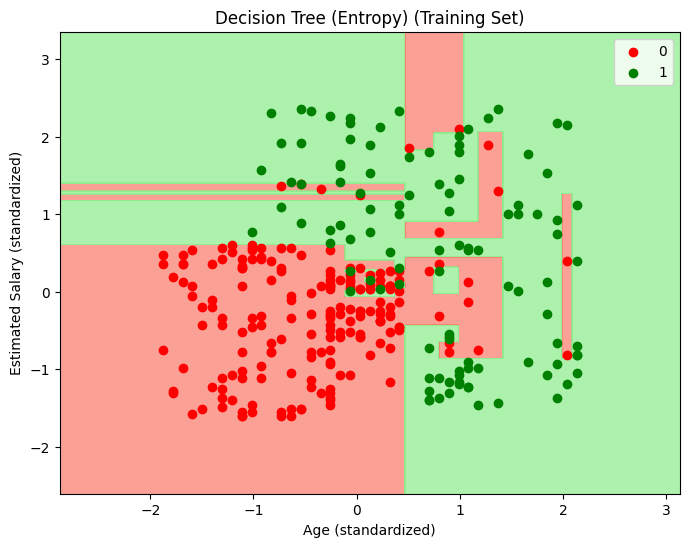

In [ ]:
# Visualize Naive Bayes on training set
model = GaussianNB()
model.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, model, "Naive Bayes (Training Set)")

# Repeat for other models:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, model, "KNN (k=5) (Training Set)")

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, model, "Decision Tree (Entropy) (Training Set)")

1. **Colored Background**:

   * The background is split into two colors:

     * **Green area**: The model predicts users **will purchase**.
     * **Red/pink area**: The model predicts users **will not purchase**.

2. **Data Points**:

   * **Green dots** = Actual users who **purchased**
   * **Red dots** = Actual users who **did not purchase**

3. **Boundary Line**:
   The sharp line or edge where the background color changes is the **decision boundary**. That’s where the model is unsure and splits the decision between buy vs not buy.

## Summary

We compared three types of classifiers on the Social Network Ads dataset:

- **Naive Bayes**: Good baseline with simple assumptions.
- **K-Nearest Neighbors (KNN)**: Performed well with k=5 or 7.
- **Decision Tree**: Gini and Entropy both worked, with slightly different splits.

**Best model depends on the metric prioritized** (e.g., F1-score if balanced performance is desired).

Further improvement possible via hyperparameter tuning and cross-validation.